Immunoglobulin G Coding Notebook, Kai Vaughn. University of Vermont-CSYS 296

In [126]:
%reset 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [127]:
#load libraries

#import libraries 
import numpy as np
from matplotlib import pyplot as plt
from Bio.PDB import *
import nglview as nv
import ipywidgets
# part 2
from Bio import SeqIO
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from scipy.integrate import solve_ivp


In [128]:
#Get structures
pdb_parser = PDBParser()
#Human IgG1, IgG4 - These are the only two immunoglobulins with complete structures
h_igg1 = pdb_parser.get_structure('hu_igg1', "hu_igg1.pdb")
h_igg4 = pdb_parser.get_structure('hu_igg4', "hu_igg4.pdb")


C:\Users\kazia\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 11405.
  warnings.warn(
C:\Users\kazia\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 11420.
  warnings.warn(
C:\Users\kazia\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 11458.
  warnings.warn(
C:\Users\kazia\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 11464.
  warnings.warn(
C:\Users\kazia\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21268.
  warnings.warn(
C:\Users\kazia\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21273.
  warnings.warn(
C:\Users\k

In [129]:
#visualize each protein with biopython
igg1 = nv.show_biopython(h_igg1)
igg4 = nv.show_biopython(h_igg4)

#call the individual proteins for visualization
igg1


NGLWidget()

In [130]:
igg4 #call the individual proteins for visualization

NGLWidget()

In [175]:
#build Michaelis-Menten kinetics w SPIKE Antigen model 
#This function was written by Dr. David Bernstein, University of Vermont, for CSYS 296: Comp. Bio for enzyme kinetics modeling using a Michaelis Menten approach

#we can model antibody neutralizing abilities with Michaelis-Menten enzyme kinetics
#Substrate = antigen , #enzyme = antibody

# Constants
K_cat = 4000
K_M = 4.6e-7   # 'antibody' average Kd value
# Variables 
E_0 = 6.4e-5 #initial antibody content 
# ODE
def MM_dynamics(t,y,K_cat,K_M,E_0):
    # y[0] = B product
    # y[1] = A reactant
    dydt = np.zeros(2)
    v = K_cat*E_0*(y[1]/(K_M+y[1])) #E_0 is Enzyme total
    dydt[0] = v  #totol amount of enzyme 
    dydt[1] = -v
    return dydt

In [176]:
# Initial Conditions
y0 = [0,1000]
# time span
t = np.linspace(0,2500)
tspan = [t[0],t[-1]]

ode_sol = solve_ivp(lambda t,y:MM_dynamics(t,y,K_cat,K_M,E_0),tspan,y0,t_eval=t)

Text(0.5, 1.0, 'Initial COVID Infection')

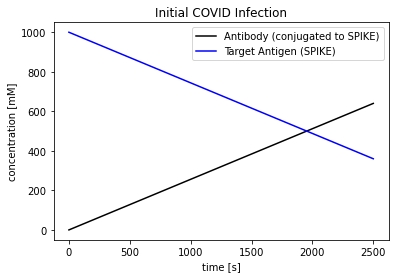

In [177]:
plt.plot(t,ode_sol.y[0], color = 'black')
plt.plot(t,ode_sol.y[1], color = 'blue')
plt.xlabel('time [s]')
plt.ylabel('concentration [mM]')
plt.legend(['Antibody (conjugated to SPIKE)','Target Antigen (SPIKE)']);
plt.title("Initial COVID Infection")

In [184]:
# Constants
K_cat = 4000
K_M = 7.0e-9    # 'antibody' mM concentration based upon peak 
# Variables 
E_0 = 3e-4
# ODE
def MM_dynamics(t,y,K_cat,K_M,E_0):
    # y[0] = B product
    # y[1] = A reactant
    dydt = np.zeros(2)
    v = K_cat*E_0*(y[1]/(K_M+y[1])) #E_0 is Enzyme total
    dydt[0] = v  #totol amount of enzyme 
    dydt[1] = -v
    return dydt

# Initial Conditions
y0 = [0,1000]
# time span
t = np.linspace(0,2000)
tspan = [t[0],t[-1]]

ode_sol = solve_ivp(lambda t,y:MM_dynamics(t,y,K_cat,K_M,E_0),tspan,y0,t_eval=t)

(0.0, 2000.0)

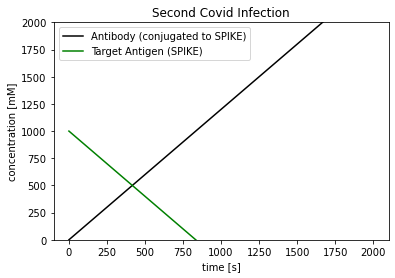

In [188]:
plt.plot(t,ode_sol.y[0], color = 'black')
plt.plot(t,ode_sol.y[1], color = 'green')
plt.xlabel('time [s]')
plt.ylabel('concentration [mM]')
plt.legend(['Antibody (conjugated to SPIKE)','Target Antigen (SPIKE)']);
plt.title("Second Covid Infection")
plt.ylim(0,2000)